In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import labwork

In [58]:
help(labwork)

Help on module labwork:

NAME
    labwork

FUNCTIONS
    bordering(V)
    
    eval_mnk(x, y)
    
    linPlot(x, y, xlabel='', ylabel='', title='', figsize=(14, 7), fontsize=15, labplot=False, plot_to_zero=False)
        Строит график измерений x,y и линейное приближение
        зависимости по МНК (y = bx + a).
        Возвращает: a, b, sigma_a, sigma_b
    
    plotIntervals(x, x_std, y, y_std, xlabel='Значения', ylabel='Номер измерения', title='', fontsize=15)
        Строит сравнительный график значений x[i] c y[i],
        где x_std[i] и y_std[i] - их стандартные отклонения
    
    plt_lab_figure(X_max, Y_max, X_min=0, Y_min=0, k_off_x=1.05, k_off_y=1.05)
    
    prodErrorR(errors)
    
    prodErrorR_degs(errors)
    
    sciPrintD(val, dErr, name=None)
    
    sciPrintR(val, relErr, name=None)
    
    sciRoundD(V, V_D, unit='')
        По числу V и его абсолютной погрешности V_R
        возвращает строку, в которой число округлено по
        правилам лобораторных работ
    


In [61]:
def sumErrorR(vals, r_errs):
    vals = np.array(vals)
    errs = np.array(r_errs)
    a_errs = vals * r_errs
    return sumErrorD(a_errs) / (vals.sum())

def sumErrorD(abs_errs):
    return ((abs_errs ** 2).sum()) ** 0.5

In [62]:
sumErrorR([2, 3], [4./2, 3./3])

1.0

### I. Опыт со зрительными трубами

In [92]:
19 - 5.5 - 7.5 

6.0

In [130]:
L_s = (4) ** 0.5 * 0.1
print(L_s)
l1 = 9.3 + 0.75  # they are seems to be the focuses
l2 = 14 + 0.7
l3 = 40.1
# Santimeters
print("f1 = ", labwork.sciRoundD(l1, L_s))
print("f2 = ", labwork.sciRoundD(l2, L_s))
print("f3 = ", labwork.sciRoundD(l3, L_s))

0.2
f1 =  10100 ± 200 [1e-3] (2%)
f2 =  14700 ± 200 [1e-3] (1.4000000000000001%)
f3 =  40100 ± 200 [1e-3] (0.5%)


In [132]:
l4 = 29 - 16.5

print("f4 = ", labwork.sciRoundD(l4, (4) ** 0.5 * 0.1))

f4 =  12500 ± 200 [1e-3] (1.6%)


### II. Измерение через L, d

In [134]:
L = 61.8
s_L = 0.5

d1 = 33.7 - 28.6
d2 = 50.0 - 13.5
L, d1, d2

(61.8, 5.100000000000001, 36.5)

In [135]:
def eval_f(L, d, s_L, s_d):
    a = (L  - d) / 2.
    s_a = sumErrorR([L, d], [s_L, s_d])
    b = L - a
    assert b == (L + d) / 2.  # s_b == s_a
    # print(a, b)
    s_f_inv = sumErrorR([1./a, 1./b], [s_a, s_a])
    f = 1./ (1./a + 1./b)
    return f, s_f_inv

In [136]:
print("F = " + labwork.sciRoundR(*eval_f(L, d1, 0.5 / L, 0.5 / d1), "см"))
print("F = " + labwork.sciRoundR(*eval_f(L, d2, 0.5 / L, 0.5 / d2), "см"))

F = 15340 ± 120 [1e-3 x см] (0.7000000000000001%)
F = 10060 ± 60 [1e-3 x см] (0.6000000000000001%)


### III. Измерение через a_i, b_i

In [116]:
F = 10.  # Probably

shift = -0.2  # ДАННЫЕ ПОДОГНАНЫ, ЛИНЗА БЫЛА НЕ ПО ЦЕНТРУ !!!!!!!!!!!!!!!!

a = np.array([
    14.8,
    20.3,
    25.5,
    30.7,
    35.5,
    40.5,
    44.5,
]) + shift

b = np.array([
    33.3,
    20.3,
    16.8,
    15.1,
    13.8,
    13.2,
    12.7,
]) -shift

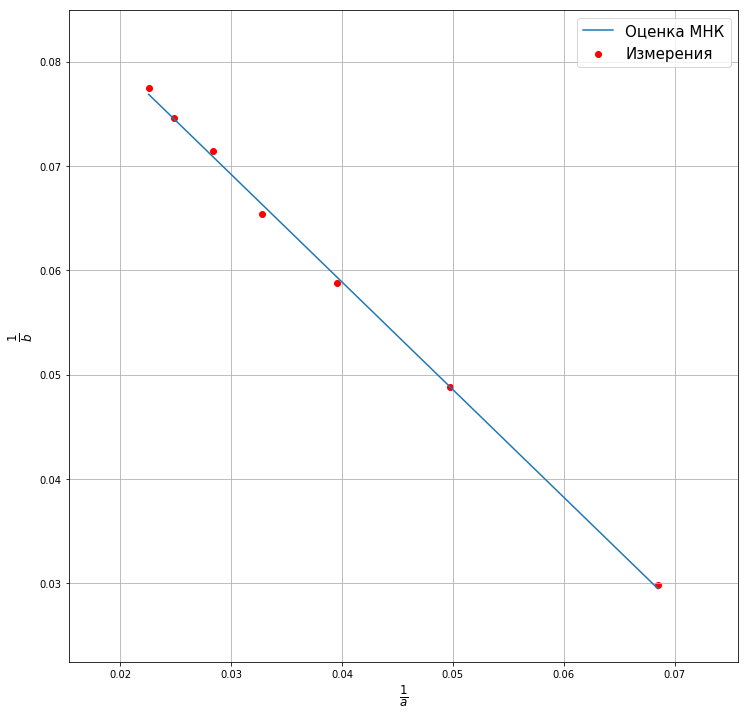

In [128]:
k1, k2, s_k1, s_k2 = labwork.eval_mnk(1/a, 1/b)
grid = np.linspace((1/a).min(),  (1/a).max(), 1000)
plt.figure(figsize=(12, 12))
plt.scatter(1./a, 1./b, label="Измерения", color="red")
plt.plot(grid, grid * k2 + k1, label="Оценка МНК")
plt.xlabel(r"$\frac{1}{a}$", fontsize=17)
plt.ylabel(r"$\frac{1}{b}$", fontsize=17)
plt.grid()
plt.legend(fontsize=15)
plt.savefig("lenses.pdf", papertype="a4")
plt.show()



In [138]:
F_star = 1./k1
print("F=" + labwork.sciRoundR(F_star, s_k1 / k1))

F=9980 ± 20 [1e-3] (0.2%)


### IV. Кеплер

In [143]:
f = 25.0
f1 = 10.
f2 = 150
f1_plus_f2 = 254
x1 = 4.5
x2 = 7

In [144]:
Г_real = x1 / x2
Г_obtained = f1 / f2
Г_real, Г_obtained

(0.6428571428571429, 0.06666666666666667)

In [150]:
Г_real = x1 / x2
Г_obtained = 998. / 1534  # f1 из 3 опыта, f2 - из 2 опыта
print("Г_obtained =", labwork.sciRoundR(Г_obtained, (0.007**2 + 0.002**2)**0.5)) 
print("Г_real =", labwork.sciRoundR(Г_real, 0.5/x1)) 
Г_obtained, (Г_real - Г_obtained) / Г_obtained

Г_obtained = 651 ± 5 [1e-3] (0.7000000000000001%)
Г_real = 640 ± 70 [1e-3] (11%)


(0.6505867014341591, -0.011880904666475775)

In [ ]:
Г_real, Г_obtained

In [163]:
f = 150
f1 = 250
f2 = -130
x1 = 3
x2 = 1.5
L = 11.8

In [164]:
Г_real = x1 / x2
Г_obtained = f1 / f2
Г_real, Г_obtained

(2.0, -1.9230769230769231)

In [166]:
Г_real = x1 / x2
Г_obtained = f1 / -125
print("Г_obtained =", labwork.sciRoundR(-Г_obtained, 0.016)) 
print("Г_real =", labwork.sciRoundR(Г_real, 0.5/x1)) 
Г_obtained, (Г_real + Г_obtained) / Г_obtained

Г_obtained = 2000 ± 30 [1e-3] (1.6%)
Г_real = 2000 ± 300 [1e-3] (17%)


(-2.0, -0.0)